In [2]:
from mainfunctions import *
from preprocessing import *



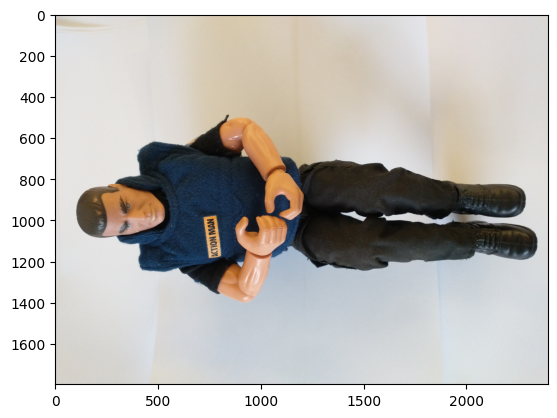

NameError: name 'preprocessng' is not defined

In [3]:
rgb_img = imageio.imread("photos/actionman_whitebg.jpg")
#show
plt.imshow(rgb_img)
plt.show()
material_properties,final_image,specular_image=preprocessng(rgb_img,show=True)


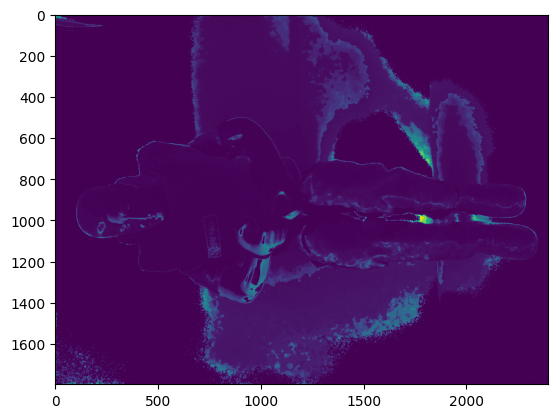

In [3]:
#show specular image
plt.imshow(specular_image)

In [1]:
# Example 1
#rgb_img = imageio.imread("photos/very_old_sword.jpg")

rgb_img = imageio.imread("action_man_no_black.png")
#rgb_img = imageio.imread("photos/action_man_diffuse.jpg")
#rgb_img = imageio.imread("photos/action_man_wood.jpg")
#rgb_img = imageio.imread("photos/actionman_whitebg.jpg")


rgb_img= rgb_img[:,:,0:3] #remove alpha channel

#show hsv 
hsv_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2HSV)
hue= hsv_img[:,:,0]
sat= hsv_img[:,:,1]
val= hsv_img[:,:,2]

plt.imshow(hue, cmap='hsv')
plt.colorbar()
plt.show()

plt.imshow(sat, cmap='hsv')
plt.colorbar()
plt.show()

plt.imshow(val, cmap='hsv')
plt.colorbar()
plt.show()


NameError: name 'imageio' is not defined

In [ ]:
def remove_small_objects(mask, min_size):
    #find all the contours in the mask
    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    #create a new mask
    new_mask = np.zeros_like(mask)
    #for each contour
    for contour in contours:
        #if the contour is large enough
        if cv.contourArea(contour) > min_size:
            #draw the contour on the new mask
            cv.drawContours(new_mask, [contour], -1, 255, -1)
    return new_mask

#implement a region growing algorithm to remove the background
#convert to grayscale
gray_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2GRAY)
#show the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.colorbar()
plt.show()

#threshold
white_mask= cv.inRange(gray_img, 230, 255)
upper_mask= cv.inRange(gray_img, 200, 255)
lower_mask= cv.inRange(gray_img, 0, 0)
white_mask= cv.bitwise_or(white_mask, lower_mask)
mask= cv.bitwise_or(upper_mask, lower_mask)
#invert the threshold
threshold_img = cv.bitwise_not(mask)
threshold_img = remove_small_objects(threshold_img, 50)

white_mask = remove_small_objects(white_mask, 50)

#show white mask
plt.imshow(white_mask, cmap='gray')
plt.title('white mask')
plt.colorbar()
plt.show()


plt.subplot(1,2,1)
#remove axis
plt.axis('off')
plt.imshow(mask, cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(threshold_img, cmap='gray')
plt.show()
#clean up mask by removing small objects
#apply the mask to the original image
masked_img = cv.bitwise_and(rgb_img, rgb_img, mask=threshold_img)

plt.subplot(1,2,1)
plt.imshow(rgb_img)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(masked_img)
plt.axis('off')
plt.show()

#save masked image as png
imageio.imwrite('action_man_no_white.png', masked_img)

#show specular component
D, S= specular_removal(rgb_img,0.7,show= 0)
D2, S2= specular_removal(masked_img,0.7,show= 0)
plt.subplot(1,2,1)
plt.imshow(S)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(S2)
plt.axis('off')


In [ ]:
# show specular component in grayscale
plt.subplot(1,2,1)
plt.imshow( S, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow( S2, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
#removing black materials 

rgb_img = imageio.imread("photos/actionman_whitebg.jpg")
rgb_img= rgb_img[:,:,0:3] #remove alpha channel

#show hsv 
hsv_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2HSV)
hue= hsv_img[:,:,0]
sat= hsv_img[:,:,1]
val= hsv_img[:,:,2]


gray_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2GRAY)
#show the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.colorbar()
plt.show()

#threshold
black_mask= cv.inRange(gray_img, 0, 40)
#invert the threshold
threshold_img = remove_small_objects(black_mask, 50)
inverse_mask = cv.bitwise_not(black_mask)

#show mask 
plt.imshow(threshold_img, cmap='gray')
plt.title('image')
plt.colorbar()
plt.show()

#apply the mask to the original image
masked_img = cv.bitwise_and(rgb_img, rgb_img, mask=inverse_mask)
plt.imshow(masked_img)
plt.title('masked image')
plt.show()

#original image
plt.imshow(rgb_img)



In [ ]:
def remove_white(image, upper_threshold1, white_threshold,percentage_pixels_removed, show_images=0):
    #convert to grayscale
    gray_img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    n_pixels_removed= 50
    #threshold
    mask= cv.inRange(gray_img, upper_threshold1, 255)
    mask_removed= remove_small_objects(mask, n_pixels_removed)
    white_mask= cv.inRange(gray_img,white_threshold, 255)
    white_mask_removed= remove_small_objects(white_mask, n_pixels_removed)
    #invert the threshold
    threshold_img = cv.bitwise_not(mask)

    final_image = cv.bitwise_and(image, image, mask=threshold_img)

    if show_images:
        plt.subplot(1,2,1)
        plt.imshow(mask, cmap='gray')
        plt.title('mask')
        plt.axis('off')
        plt.subplot(1,2,2)
        plt.imshow(threshold_img, cmap='gray')
        plt.title('threshold')
        plt.axis('off')
        plt.show()
        plt.subplot(1,2,1)
        plt.imshow(image)
        plt.title('original image')        
        plt.axis('off')

        plt.subplot(1,2,2)
        plt.imshow(final_image)
        plt.title('final image')
        plt.axis('off')
        plt.show()
        plt.imshow(white_mask, cmap='gray')
        plt.title('white mask')
        plt.axis('off')
    return final_image, white_mask_removed

#remove black function

def remove_black(image, lower_threshold1, black_threshold,percentage_pixels_removed, show_images=0):
    #convert to grayscale
    gray_img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    n_pixels_removed= 50
    #threshold
    mask= cv.inRange(gray_img, 0, lower_threshold1)
    mask_removed= remove_small_objects(mask, n_pixels_removed)
    black_mask= cv.inRange(gray_img, 0, black_threshold)
    black_mask_removed= remove_small_objects(black_mask, n_pixels_removed)
    #invert the threshold
    threshold_img = cv.bitwise_not(mask)

    final_image = cv.bitwise_and(image, image, mask=threshold_img)

    if show_images:
        plt.subplot(1,2,1)
        plt.imshow(mask, cmap='gray')
        plt.title('mask')
        plt.axis('off')
        plt.subplot(1,2,2)
        plt.imshow(threshold_img, cmap='gray')
        plt.title('threshold')
        plt.axis('off')
        plt.show()
        plt.subplot(1,2,1)
        plt.imshow(image)
        plt.title('original image')        
        plt.axis('off')

        plt.subplot(1,2,2)
        plt.imshow(final_image)
        plt.title('final image')
        plt.axis('off')
        plt.show()
        plt.imshow(black_mask, cmap='gray')
        plt.title('black mask')
        plt.axis('off')
    return final_image, black_mask_removed

In [ ]:
final_image, white_mask_removed= remove_white(rgb_img, 200, 230, 0.0001, show_images=1)

In [ ]:
final_image, black_mask_removed= remove_black(rgb_img, 20, 5, 0.0001, show_images=1)

In [ ]:
#save masked image as
imageio.imwrite('action_man_no_black.png', masked_img)